In [787]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [788]:
#load the data
data=pd.read_csv("../../data/01-modified-data/cleaned_supervised_data.csv")
y=data["label"]


In [789]:
#count the frequency of words
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(data.text)
X = pd.DataFrame(matrix.toarray(),columns=vectorizer.get_feature_names_out())
X=X.loc[:,"aaron":]

In [790]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [791]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)


In [792]:
#calculate the accuracy rate
from sklearn.metrics import accuracy_score
accuracy_score(y_test.values,y_predict)


0.835820895522388

In [793]:
#calculate the confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
cf=metrics.confusion_matrix(y_test.values, y_predict)
cf

array([[ 2,  4],
       [ 7, 54]], dtype=int64)

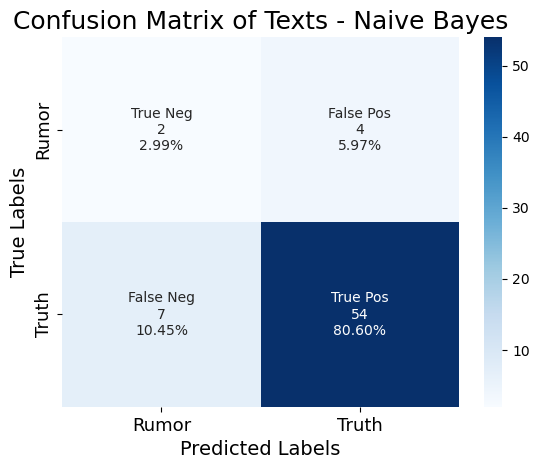

In [794]:
# visualize the confusion Matirx
# customize the anno
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
#plot the heatmap
fig=sns.heatmap(cf, annot=labels, fmt="", cmap='Blues')
plt.title("Confusion Matrix of Texts - Naive Bayes",fontsize=18)
fig.set_xticklabels(["Rumor","Truth"],fontsize=13)
fig.set_yticklabels(["Rumor","Truth"],fontsize=13)
fig.set_xlabel("Predicted Labels",fontsize=14)
fig.set_ylabel("True Labels",fontsize=14)
plt.show()
heatmap = fig.get_figure()
# save the picture
heatmap.savefig("../../501-project-website/images/confusion_matirx_text_naive_bayes")


<Figure size 640x480 with 0 Axes>

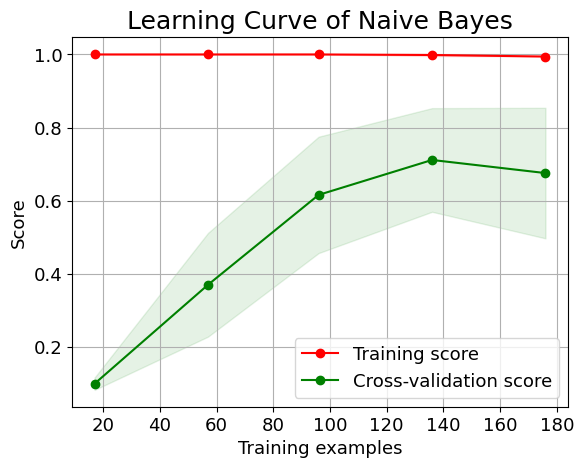

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [801]:
#plot the learning Curve
import scikitplot as skplt
probas_list=[y_predict]
clf_names=["Naive Bayes"]
a=skplt.estimators.plot_learning_curve(clf, X, y,text_fontsize=13)
plt.title("Learning Curve of Naive Bayes",fontsize=18)
plt.show()
a.savefig("../../501-project-website/images/learning_curve_text_naive_bayes")